In [1]:
# Create a plot with some random data points
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

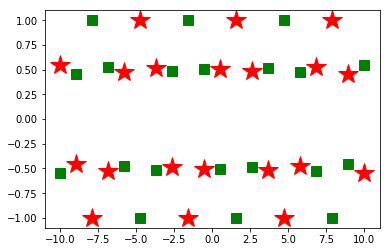

In [18]:
x = np.linspace(-10,10,20)
y = np.sin(x)
plt.plot(x,y, marker='*', linestyle='', color="red", markersize=20)
plt.plot(x,-y, marker='s', linestyle='', color="green", markersize=10)
plt.savefig("images/markers.png")